In [23]:
from tkinter import Tk
from tkinter import filedialog as fd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from functions import *

In [33]:
def transcript_text_to_lines(input_filepath):
    '''
    takes: filepath
    returns: list of lines, chat name
    '''
    
    # Loads the text into a list
    with open(input_filepath, 'r', encoding="utf8") as f:
        chat_lines = f.readlines()
        f.close()

    # Removes the first line if it is an administrative message
    if ':' not in chat_lines[0][20:]:
        chat_lines.remove(chat_lines[0])

    # Gets the name of the chat
    chat_name = input_filepath[input_filepath.rfind('WhatsApp Chat with '):]
    
    return chat_lines, chat_name


# time stamp index = 17 (or 19 if in Croatian)
def chat_lines_to_dictionary(chat_lines, chat_name, time_stamp_index):
    '''
    takes: list of chat_lines, name of the chat, end index of the time stamp
    returns: dictionary of messages
    '''

    # Dictionary for storing all the messages
    message_dict = {
        'timestamp': [],
        'chat_name': [],
        'sender': [],
        'contents': []
    }
    
    for line in chat_lines:
        # If a line is a valid new message
        if (len(line) > time_stamp_index+2) and (line[2] in '/.') and (':' in line[20:]):
            message_dict['chat_name'].append(chat_name)
            
            message_dict['timestamp'].append(line[:time_stamp_index])
            line = line[time_stamp_index+3:]
            
            message_dict['sender'].append(line[:line.find(':')])
            line = line[line.find(':') + 2:]
            
            message_dict['contents'].append(line)
        # If a line is a continuation of the previous message
        else:
            if message_dict['contents']:
                message_dict['contents'][-1] += line

    return message_dict


# Turns the dictionary into a dataframe
def chat_dicionary_to_dataframe(message_dict):
    message_dataframe = pd.DataFrame(message_dict)
    return message_dataframe


# General function to turn a filepath into a dataframe
def input_filepath_to_dataframe():
    '''
    allows the user to input a filepath to a WhatsApp chat transcript
    returns a dataframe
    '''
    
    time_stamp_index = 17
    input_path = fd.askopenfilename()
    
    chat_lines, chat_name = transcript_text_to_lines(input_path)
    chat_dictionary = chat_lines_to_dictionary(chat_lines, chat_name, time_stamp_index)
    chat_df = chat_dicionary_to_dataframe(chat_dictionary)
    
    return chat_df

In [ ]:
chat_df = input_filepath_to_dataframe()

display(chat_df)

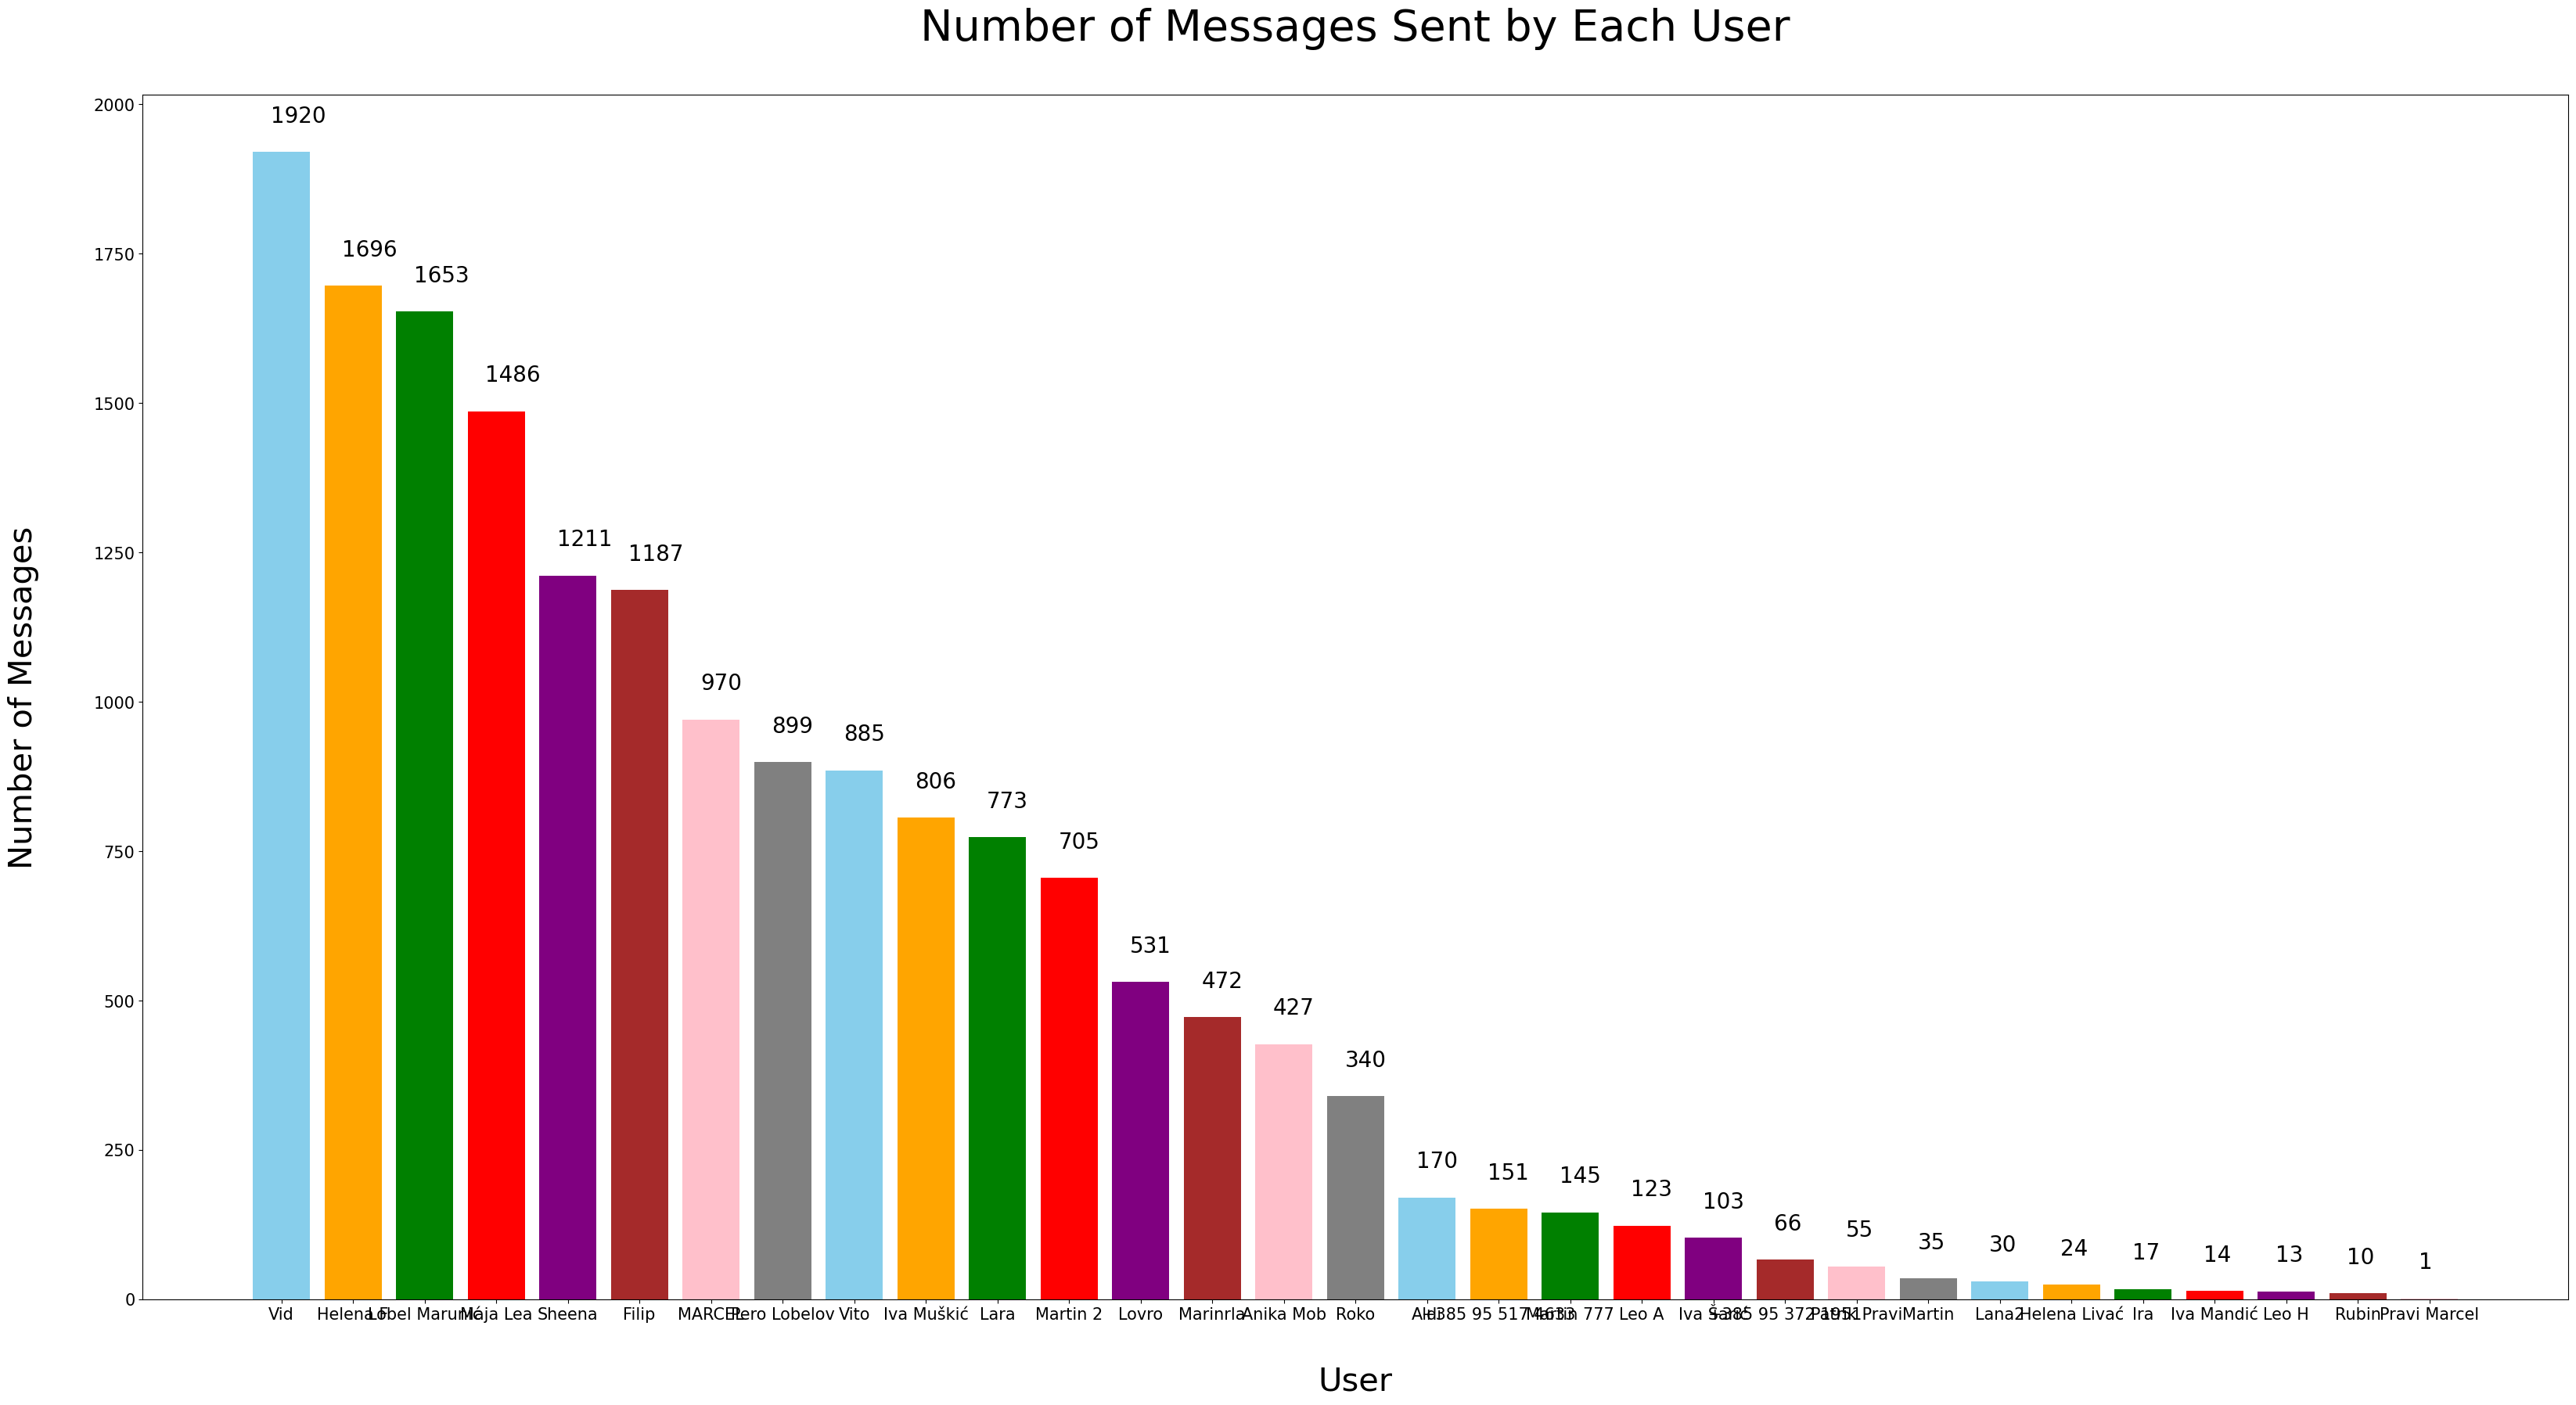

In [35]:
# Takes a pandas dataframe, returns a pandas dataframe
from itertools import count


def count_user_messages(message_dataframe):
    user_message_counts = message_dataframe['sender'].value_counts().reset_index()
    user_message_counts.columns = ['sender', 'message_count']
    user_message_count_df = pd.DataFrame(user_message_counts)

    # Manually specify colors for each user
    colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

    plt.figure(figsize=(40, 20))
    bars = plt.bar(user_message_count_df['sender'], user_message_count_df['message_count'],  color=colors[:len(user_message_count_df)])
    plt.xlabel('User', fontsize=30, labelpad=40)  # Increase font size and set label padding for x-axis label
    plt.ylabel('Number of Messages', fontsize=30, labelpad=50)  # Increase font size and set label padding for y-axis label
    plt.title('Number of Messages Sent by Each User', fontsize=40, pad=50)  # Increase font size and set title padding

    # Increase font size for x-axis and y-axis ticks
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Add value annotations on top of the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(int(bar.get_height())),
            fontsize=20, color='black')

    plt.savefig('user_message_count.png')

    plt.show()
    
count_user_messages(chat_df)

In [ ]:
def to_ymd_date (timestamp):
    day = timestamp[0:2]
    month = timestamp[3:5]
    year = timestamp[6:10]
    return f'{year}-{month}-{day}'

def to_dmy_date (timestamp):
    day = timestamp[8:10]
    month = timestamp[5:7]
    year = timestamp[:4]
    return f'{day}-{month}-{year}'


def GenerateDateFrame(messages):
    # Zoome time

    date_dict = {
        'date': [],
        'number_of_messages': []
    }

    starting_date = '12/11/2022'
    earliest = to_ymd_date(messages.iloc[0]['timestamp'])

    for i in pd.date_range(start='12/11/2022',end=to_ymd_date(messages.iloc[-1]['timestamp'])):
        date_dict['date'].append(to_dmy_date(str(i)[:10]))
        date_dict['number_of_messages'].append(0)

    messages = messages.reset_index(drop=True)

    for index, row in messages.iterrows():
        if to_dmy_date(to_ymd_date(row['timestamp'])) in date_dict['date']:
            date_dict['number_of_messages'][date_dict['date'].index(to_dmy_date(to_ymd_date(row['timestamp'])))] += 1  

    dates = pd.DataFrame(date_dict)

    dates = dates.set_index('date')

    return dates

# Takes a pandas dataframe, returns a pandas dataframe
def count_user_messages(message_dataframe):
    user_message_counts = message_dataframe['sender'].value_counts().reset_index()
    user_message_counts.columns = ['sender', 'message_count']
    user_message_count_df = pd.DataFrame(user_message_counts)

    # Manually specify colors for each user
    colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

    plt.figure(figsize=(40, 20))
    bars = plt.bar(user_message_count_df['sender'], user_message_count_df['message_count'],  color=colors[:len(user_message_count_df)])
    plt.xlabel('User', fontsize=30, labelpad=40)  # Increase font size and set label padding for x-axis label
    plt.ylabel('Number of Messages', fontsize=30, labelpad=50)  # Increase font size and set label padding for y-axis label
    plt.title('Number of Messages Sent by Each User', fontsize=40, pad=50)  # Increase font size and set title padding

    # Increase font size for x-axis and y-axis ticks
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Add value annotations on top of the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, str(int(bar.get_height())),
            fontsize=20, color='black')

    plt.savefig('user_message_count.png')

    plt.show()